In [24]:
import matplotlib.pyplot as plt #Библиотека для рисования графиков

lyamda = 0.5
mu = 1
n = 4
k = 1000000
eps = 0.01
h = 0.001 #шаг
r = lyamda / mu
q = 0.5 * lyamda
gamma = 0.8 * mu

# Метод Эйлера
p0 = 1
p1 = 0
p2 = 0
p3 = 0
p4 = 0

pi0 = 1
pi1 = 0
pi2 = 0
pi3 = 0
pi4 = 0
t = 0

#Массивы для графиков
p0_res = []
p1_res = []
p2_res = []
p3_res = []
p4_res = []

pi0_res = []
pi1_res = []
pi2_res = []
pi3_res = []
pi4_res = []

t_res = []
i = 0

#цикл на n - итераций
while(i + 1):
    t_res.append(t * 60)
    t += h;
    p0_res.append(p0)
    p1_res.append(p1)
    p2_res.append(p2)
    p3_res.append(p3)
    p4_res.append(p4)
    
    pi0_res.append(pi0)
    pi1_res.append(pi1)
    pi2_res.append(pi2)
    pi3_res.append(pi3)
    pi4_res.append(pi4)
    
    #Расчет решение системы дифференциальных уравнений
    pi0_next = pi0 + h * (-4 * q * pi0 + gamma * pi1)
    pi1_next = pi1 + h * (4 * q * pi0 - (3 * q + gamma) * pi1 + 2 * gamma * pi2)
    pi2_next = pi2 + h * (3 * q * pi1 - (2 * q + 2 * gamma) * pi2 + 2 * gamma * pi3)
    pi3_next = pi3 + h * (2 * q * pi2 - (q + 2 * gamma) * pi3 + 2 * gamma * pi4)
    pi4_next = pi4 + h * (q * pi3 - 2 * gamma * pi4)

    pi0 = pi0_next
    pi1 = pi1_next
    pi2 = pi2_next
    pi3 = pi3_next
    pi4 = pi4_next
    sum1 = pi0 + pi1 + pi2 + pi3 + pi4
    
    p0_next = p0 + h * (-lyamda * (1 - pi4) * p0 + (mu + q)  * p1)
    p1_next = p1 + h * ( -(lyamda * (pi0 + pi1 + pi2) + (mu + q)) *\
                        p1 + lyamda * (1 - pi4) * p0 + 2 * (mu + q) * p2)
    p2_next = p2 + h * ( -(lyamda * (pi0 + pi1) + 2 * (mu + q)) * p2\
                        + lyamda * (pi0 + pi1 + pi2) * p1  + 3 * (mu + q) * p3)
    p3_next = p3 + h * ( -(lyamda * pi0 + 3 * (mu + q)) * p3 + lyamda\
                        * (pi0 + pi1) * p2  + 4 * (mu + q) * p4)
    p4_next = p4 + h * (lyamda * pi0 * p3 - 4 * (mu + q) * p4)
    
    p0 = p0_next; p1 = p1_next; p2 = p2_next; p3 = p3_next; p4 = p4_next 
    sum2 = p0 + p1 + p2 + p3 + p4
    if ((sum1 > 1 + eps) or ( sum1 < 1 - eps) or (sum2 > 1 + eps)\
        or ( sum2 < 1 - eps) or (i > k)):
        break
    i += 1

print("Численное интегрирование методом Эйлера:")
print("Сумма вероятностей состояний системы = %f" % sum2)
print("P0 = {:.5f}\nP1 = {:.5f}\nP2 = {:.5f}\nP3 = {:.5f}\nP4 = {:.5f}\n".format(p0, p1, p2, p3, p4))
print("Сумма вероятностей состояний приборов = %f" % sum1)
print("Pi0 = {:.5f}\nPi1 = {:.5f}\nPi2 = {:.5f}\nPi3 = {:.5f}\nPi4 = {:.5f}\n".format(pi0, pi1, pi2, pi3, pi4))

p_f = p0 * pi4 + p1 * pi3 + p2 * pi2 + p3 * pi1 + p4 * pi0
print("Вероятность отказа заявке = %.4f" % p_f)
p_inter = q / lyamda * (p1 + 2 * p2 + 3 * p3 + 4 * p4)
print("Вероятность прерванного обслуживания заявки = %.4f" % p_inter)
p_otk = p_f + p_inter
print("Вероятность отказа заявки = %.4f" % p_otk)
p_s = 1 - p_otk
print("Вероятность обслуженной заявки = %.4f" % p_s)
m_b = 1 * p1 + 2 * p2 + 3 * p3 + 4 * p4 
print("Математическое ожидание числа занятых приборов = %.4f" % m_b)
m_br = 1 * pi1 + 2 * pi2 + 3 * pi3 + 4 * pi4 
print("Математическое ожидание числа нерабочих приборов = %.4f" % m_br)
m_ok = n - m_b - m_br
print("Математическое ожидание числа исправных приборов = %.4f" % m_ok)
k_f = m_ok / n
print("Коэффициент простоя свободных приборов = %.4f" % k_f)
k_b = m_b / n
print("Коэффициент занятости приборов = %.4f" % k_b)
k_r = m_br / n
print("Коэффициент надежности приборов = %.4f" % k_r)

Численное интегрирование методом Эйлера:
Сумма вероятностей состояний системы = 1.000000
P0 = 0.67683
P1 = 0.26819
P2 = 0.04991
P3 = 0.00491
P4 = 0.00016

Сумма вероятностей состояний приборов = 1.000000
Pi0 = 0.32812
Pi1 = 0.41015
Pi2 = 0.19226
Pi3 = 0.06008
Pi4 = 0.00939

Вероятность отказа заявке = 0.0341
Вероятность прерванного обслуживания заявки = 0.1917
Вероятность отказа заявки = 0.2258
Вероятность обслуженной заявки = 0.7742
Математическое ожидание числа занятых приборов = 0.3834
Математическое ожидание числа нерабочих приборов = 1.0125
Математическое ожидание числа исправных приборов = 2.6041
Коэффициент простоя свободных приборов = 0.6510
Коэффициент занятости приборов = 0.0958
Коэффициент надежности приборов = 0.2531


F:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


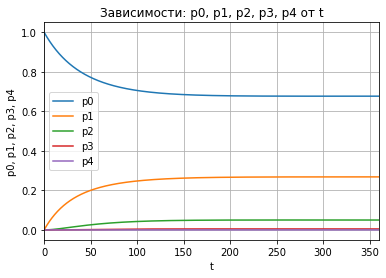

F:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


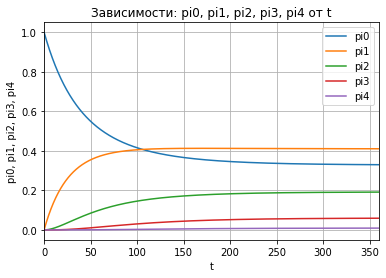

In [23]:
# Построение графика
plt.title("Зависимости: p0, p1, p2, p3, p4 от t") # заголовок
plt.xlabel("t")         # ось абсцисс
plt.ylabel("p0, p1, p2, p3, p4")    # ось ординат
plt.grid()              # включение отображение сетки

plt.plot(t_res, p0_res, label = "p0")# построение графика
plt.plot(t_res, p1_res, label = "p1")# построение графика
plt.plot(t_res, p2_res, label = "p2")# построение графика
plt.plot(t_res, p3_res, label = "p3")# построение графика
plt.plot(t_res, p4_res, label = "p4")# построение графика
plt.legend() #добавим легенду
plt.xlim(0, 360)
plt.show() #показ графика

# Построение графика
plt.title("Зависимости: pi0, pi1, pi2, pi3, pi4 от t") # заголовок
plt.xlabel("t")         # ось абсцисс
plt.ylabel("pi0, pi1, pi2, pi3, pi4")    # ось ординат
plt.grid()              # включение отображение сетки

plt.plot(t_res, pi0_res, label = "pi0")# построение графика
plt.plot(t_res, pi1_res, label = "pi1")# построение графика
plt.plot(t_res, pi2_res, label = "pi2")# построение графика
plt.plot(t_res, pi3_res, label = "pi3")# построение графика
plt.plot(t_res, pi4_res, label = "pi4")# построение графика
plt.legend() #добавим легенду
plt.xlim(0, 360)
plt.show() #показ графика